# Llama or Vicuna?

Import functions, classes, etc.

In [6]:
from fastai.vision import *

## Download images

In [9]:
folder = 'llama'
file = 'urls_llama.csv'

In [6]:
folder = 'vicuna'
file = 'urls_vicuna.csv'

In [10]:
path = Path('../data/raw/sa_camelids')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()

[PosixPath('../data/raw/sa_camelids/urls_vicuna.csv'),
 PosixPath('../data/raw/sa_camelids/vicuna'),
 PosixPath('../data/raw/sa_camelids/cleaned.csv'),
 PosixPath('../data/raw/sa_camelids/models'),
 PosixPath('../data/raw/sa_camelids/llama'),
 PosixPath('../data/raw/sa_camelids/urls_llama.csv')]

In [8]:
urlsPath = path/file
download_images(urlsPath, dest, max_pics=100, max_workers=4)

In [6]:
classes = ['llama', 'vicuna']

In [7]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

llama


vicuna


## View Data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=2).normalize(imagenet_stats)

In [14]:
data.classes

['llama', 'vicuna']

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['llama', 'vicuna'], 2, 160, 40)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.513223,0.732884,0.375000,00:35
1,0.941773,0.206644,0.075000,00:37
2,0.712315,0.211507,0.050000,00:40
3,0.568374,0.187724,0.050000,00:40


In [15]:
learn.save('stage-1')

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


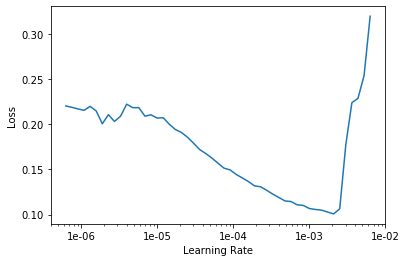

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.172725,0.186001,0.025000,00:50
1,0.203844,0.093636,0.025000,00:51


In [20]:
learn.save('stage-2')

In [19]:
learn.load('stage-2');

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

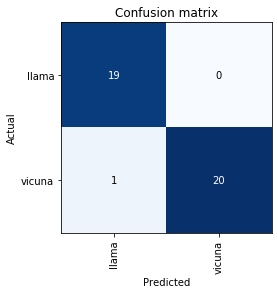

In [23]:
interp.plot_confusion_matrix()

In [4]:
from fastai.widgets import *

In [11]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [12]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [13]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [14]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [2]:
print('asdsad')

asdsad


In [15]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_none()
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [17]:
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [20]:
learn.export()

In [21]:
defaults.device = torch.device('cpu')

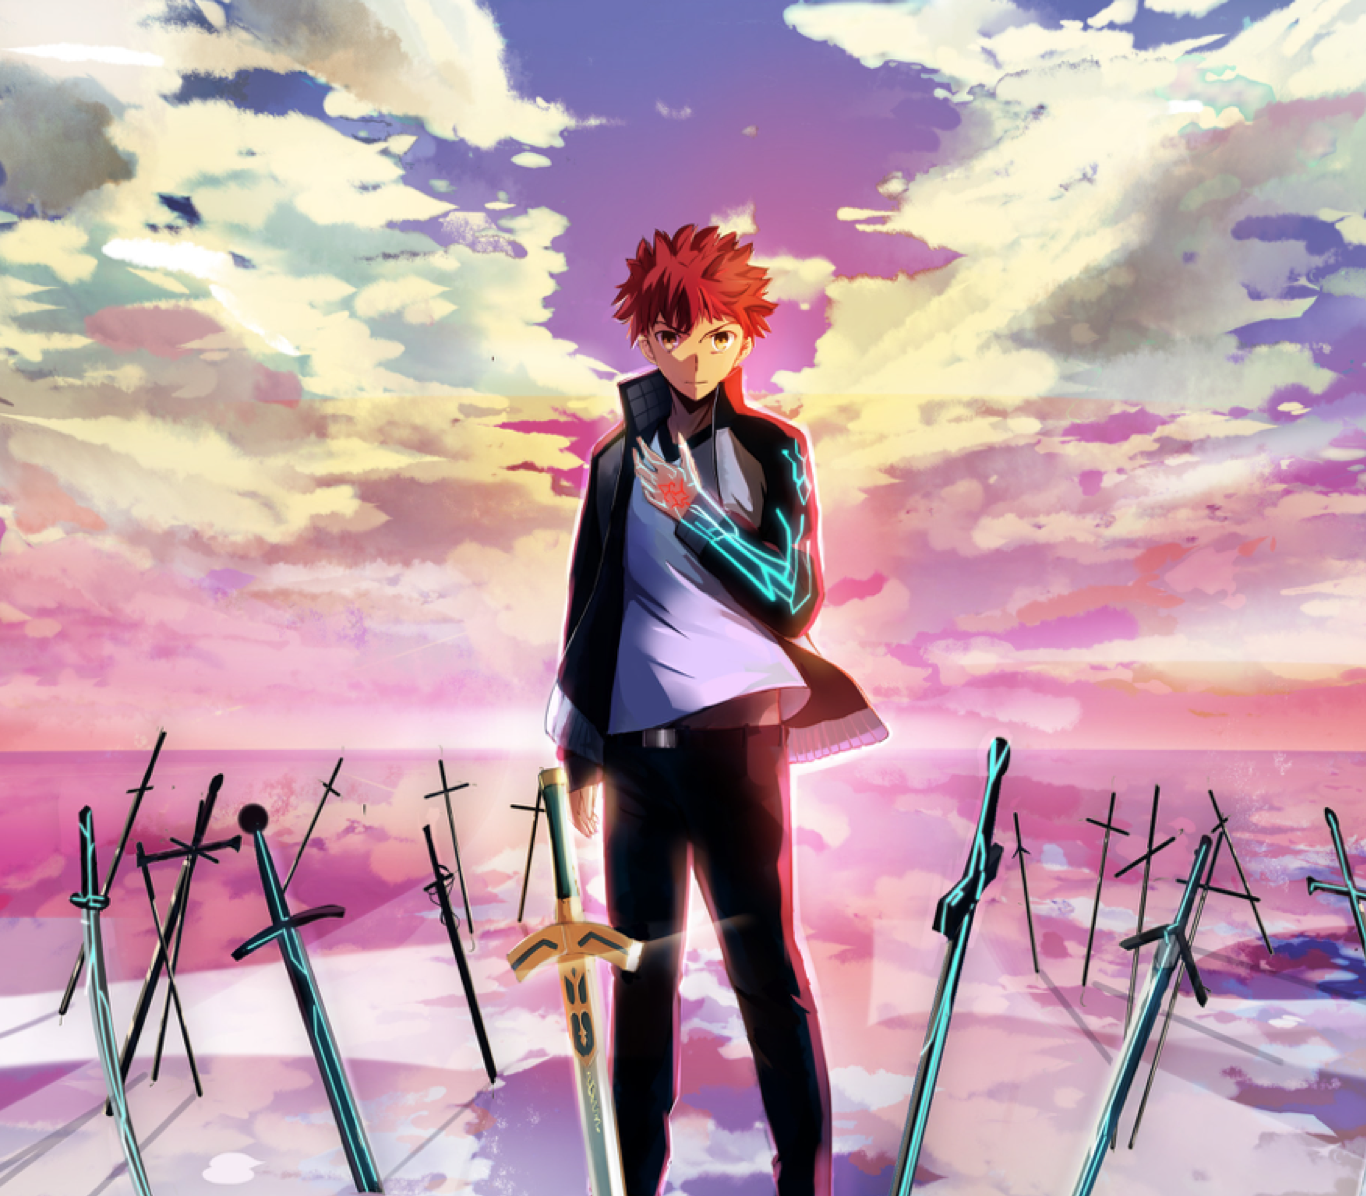

In [31]:
img = open_image(path/'tests'/'00003.png')
img

In [29]:
learn = load_learner(path)

In [33]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category llama